**AUTORES: Angie Paola Giraldo, David Morillo Cardona**

**PROFESOR: Victor Viera Balanta**

**Trabajo final con investigación**

Individual, utilice su creatividad, solución de problemas, ingenio, etc.
Usted ha sido contratado(a) de una agencia espacial donde necesitan realizar varios algoritmos de
clasificación de imágenes de Galaxias

In [ ]:
#Librerias fundamentales
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Libreria para Curva ROC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
#carga los datos de las galaxias
galaxias = pd.read_csv("/content/T_F_DR14_ZooSpec_10000.csv")

In [ ]:
galaxias.head(10)

,dr7objid,target,F0,F1,F2,F3,F4,F5,F6,F7,...,F4086,F4087,F4088,F4089,F4090,F4091,F4092,F4093,F4094,F4095
0,5.877256e+17,0.000000,0.046059,0.043267,0.031502,0.016902,0.009059,0.003922,0.003922,0.005051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.000000e+00,0.176314,0.147537,0.145765,0.112663,0.065965,0.055286,0.061957,0.059165,0.034506,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.880177e+17,0.000000,0.005051,0.010549,0.018392,0.018392,0.012894,0.008973,0.011765,0.015686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.314000e+03,0.556780,0.498529,0.467047,0.431600,0.384153,0.345231,0.301749,0.279239,0.248482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.880177e+17,0.000000,0.024188,0.028110,0.028110,0.024188,0.024188,0.028110,0.023016,0.015173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8.121569e-03,0.020890,0.027604,0.024173,0.019122,0.023043,0.021914,0.009380,0.015200,0.018843,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5.877392e+17,0.000000,0.028267,0.022725,0.022000,0.024067,0.036725,0.042224,0.044247,0.041902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.313725e+10,0.026471,0.022506,0.110533,0.110086,0.106165,0.110043,0.110043,0.106122,0.106122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.877389e+17,2.000000,0.084831,0.088753,0.098941,0.110706,0.117420,0.121341,0.125263,0.125263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7.994118e+10,0.465831,0.463486,0.462078,0.461757,0.478016,0.481212,0.489949,0.489949,0.486027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
galaxias.target.shape

(19997,)

In [ ]:
galaxias.shape

(19997, 4098)

In [ ]:
#Separamos una imagen de una galaxia y vemos su estructura
glx = 0
galaxias.iloc[[glx],2:4098]

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F4086,F4087,F4088,F4089,F4090,F4091,F4092,F4093,F4094,F4095
0,0.046059,0.043267,0.031502,0.016902,0.009059,0.003922,0.003922,0.005051,0.002302,0.016816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-51-31c51bee9bc2>:6: RuntimeWarning: invalid value encountered in cast
  pixeles_escalados = (normalizar_pixeles * 255).astype(np.uint8)


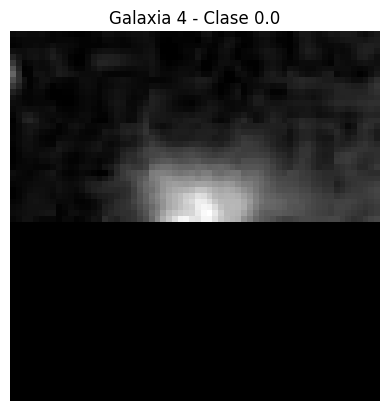

In [ ]:
#Eligimos una galaxia (de 0 a 4096)
glx = 4
normalizar_pixeles = galaxias.iloc[glx, 2:].values.astype(np.float32)  #Teniendo en cuenta que los valores están entre 0 y 1

#Escalar los valores de los píxeles al rango correcto y convertirlos a uint8
pixeles_escalados = (normalizar_pixeles * 255).astype(np.uint8)

#Realizar un reshape a los valores de los pixeles (suponiendo que la imagen es 64x64 píxeles)
imagen_tamano = (64, 64)
imagen_galaxia = pixeles_escalados.reshape(imagen_tamano)

#Dibuja la imagen
plt.imshow(imagen_galaxia, cmap='gray')
plt.title(f'Galaxia {glx} - Clase {galaxias.iloc[glx, 1]}')
plt.axis('off')  # Desactiva los ejes
plt.show()

# **SVM SIN KERNEL**

In [ ]:
 # Librerias fundamentales
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

# Carga los datos de las galaxias
galaxias = pd.read_csv("/content/T_F_DR14_ZooSpec_10000.csv")

# Dividir los datos en características (X) y variable objetivo (y)
X = galaxias.iloc[:, 2:4098]
y = galaxias['target']

# Imputa valores NaN en X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Convertir etiquetas continuas en clases binarias (0 o 1)
umbral = 0.5  # Define el umbral para la separación de clases
y_train_binary = (y_train > umbral).astype(int)
y_test_binary = (y_test > umbral).astype(int)

# Crea y entrena el modelo SVM lineal con los datos imputados y las etiquetas binarias
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train_binary)

# Hacer predicciones
y_pred = svm_model.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test_binary, y_pred)
confusion_mat = confusion_matrix(y_test_binary, y_pred)
class_report = classification_report(y_test_binary, y_pred)

# Mostrar métricas
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)




Accuracy: 0.818
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      3147
           1       0.63      0.36      0.45       853

    accuracy                           0.82      4000
   macro avg       0.74      0.65      0.67      4000
weighted avg       0.80      0.82      0.80      4000



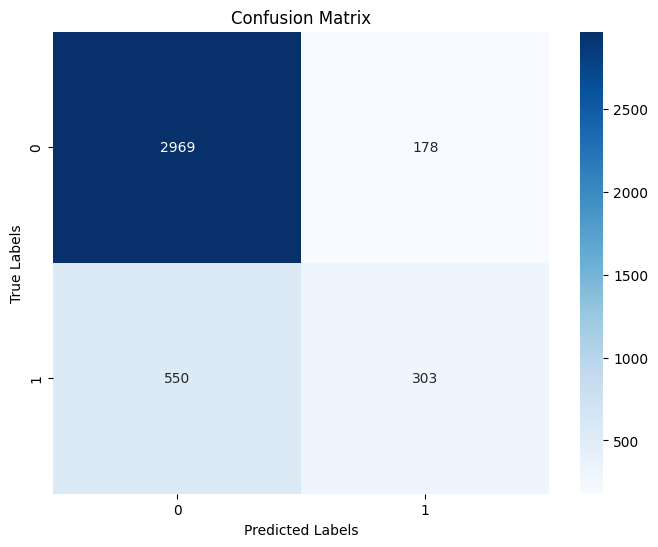

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcula la matriz de confusión
conf_mat = confusion_matrix(y_test_binary, y_pred)

# Muestra la matriz de confusión como un gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import recall_score

# Calcula la sensibilidad (recall)
recall = recall_score(y_test_binary, y_pred)

print("Sensibilidad (Recall):", recall)


Sensibilidad (Recall): 0.3552168815943728


In [ ]:
from sklearn.metrics import precision_score

# Calcula la precisión
precision = precision_score(y_test_binary, y_pred)

print("Precisión:", precision)


Precisión: 0.6299376299376299


In [ ]:
from sklearn.metrics import accuracy_score

# Calcula la exactitud (accuracy)
accuracy = accuracy_score(y_test_binary, y_pred)

print("Exactitud (Accuracy):", accuracy)


Exactitud (Accuracy): 0.818


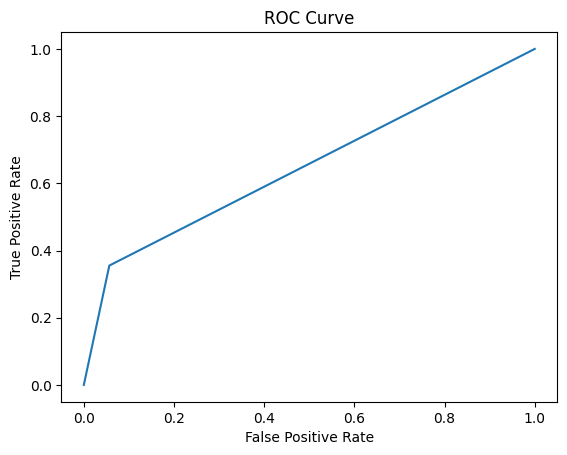

In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_curve

# Calcula la curva ROC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred)

# Muestra la curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# **SVM CON KERNEL**

In [ ]:
# Librerias fundamentales
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

# Carga los datos de las galaxias
galaxias = pd.read_csv("/content/T_F_DR14_ZooSpec_10000.csv")

# Dividir los datos en características (X) y variable objetivo (y)
X = galaxias.iloc[:, 2:4098]
y = galaxias['target']

# Imputa valores NaN en X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Convertir etiquetas continuas en clases binarias (0 o 1)
umbral = 0.5  # Define el umbral para la separación de clases
y_train_binary = (y_train > umbral).astype(int)
y_test_binary = (y_test > umbral).astype(int)

# Crea y entrena el modelo SVM con kernel gaussiano (RBF)
svm_model_rbf = SVC(kernel='rbf')
svm_model_rbf.fit(X_train, y_train_binary)

# Hacer predicciones
y_pred_rbf = svm_model_rbf.predict(X_test)

# Métricas de evaluación
accuracy_rbf = accuracy_score(y_test_binary, y_pred_rbf)
confusion_mat_rbf = confusion_matrix(y_test_binary, y_pred_rbf)
class_report_rbf = classification_report(y_test_binary, y_pred_rbf)

# Mostrar métricas
print("Accuracy (RBF):", accuracy_rbf)
print("Classification Report (RBF):\n", class_report_rbf)



Accuracy (RBF): 0.846
Classification Report (RBF):
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      3147
           1       0.74      0.43      0.54       853

    accuracy                           0.85      4000
   macro avg       0.80      0.69      0.73      4000
weighted avg       0.84      0.85      0.83      4000



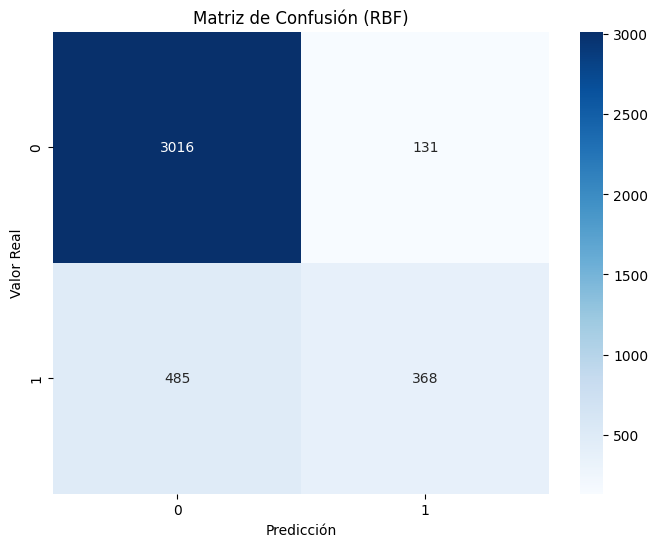

In [ ]:
import seaborn as sns

# Calcular la matriz de confusión
confusion_mat_rbf = confusion_matrix(y_test_binary, y_pred_rbf)

# Mostrar la matriz de confusión con colores
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_rbf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión (RBF)')
plt.show()



In [ ]:
from sklearn.metrics import recall_score
recall_rbf = recall_score(y_test_binary, y_pred_rbf)
print("Sensibilidad (Recall) (RBF):", recall_rbf)


Sensibilidad (Recall) (RBF): 0.43141852286049237


In [ ]:
from sklearn.metrics import precision_score
precision_rbf = precision_score(y_test_binary, y_pred_rbf)
print("Precisión (RBF):", precision_rbf)


Precisión (RBF): 0.7374749498997996


In [ ]:
print("Exactitud (Accuracy) (RBF):", accuracy_rbf)


Exactitud (Accuracy) (RBF): 0.846


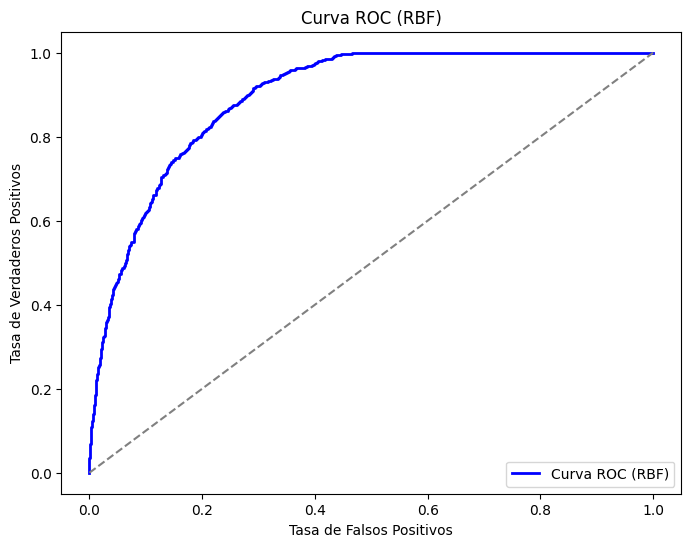

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# Calcular las probabilidades de predicción para la clase positiva
y_pred_prob_rbf = svm_model_rbf.decision_function(X_test)

# Calcular la curva ROC
fpr_rbf, tpr_rbf, thresholds_rbf = roc_curve(y_test_binary, y_pred_prob_rbf)

# Mostrar la curva ROC con colores
plt.figure(figsize=(8, 6))
plt.plot(fpr_rbf, tpr_rbf, color='blue', lw=2, label='Curva ROC (RBF)')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (RBF)')
plt.legend(loc='lower right')
plt.show()


# ***  Árboles de Decisión ***

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

# Carga los datos de las galaxias
galaxias = pd.read_csv("/content/T_F_DR14_ZooSpec_10000.csv")

# Dividir los datos en características (X) y variable objetivo (y)
X = galaxias.iloc[:, 2:4098]
y = galaxias['target']

# Imputa valores NaN en X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Convertir etiquetas continuas en clases binarias (0 o 1)
umbral = 0.5  # Define el umbral para la separación de clases
y_train_binary = (y_train > umbral).astype(int)
y_test_binary = (y_test > umbral).astype(int)

# Crear y entrenar el modelo de árbol de decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train_binary)

# Hacer predicciones
y_pred_dt = dt_model.predict(X_test)

# Métricas de evaluación
accuracy_dt = accuracy_score(y_test_binary, y_pred_dt)
confusion_mat_dt = confusion_matrix(y_test_binary, y_pred_dt)
class_report_dt = classification_report(y_test_binary, y_pred_dt)

# Mostrar métricas
print("Accuracy (Decision Tree):", accuracy_dt)
print("Confusion Matrix (Decision Tree):\n", confusion_mat_dt)
print("Classification Report (Decision Tree):\n", class_report_dt)


Accuracy (Decision Tree): 0.811
Confusion Matrix (Decision Tree):
 [[2767  380]
 [ 376  477]]
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      3147
           1       0.56      0.56      0.56       853

    accuracy                           0.81      4000
   macro avg       0.72      0.72      0.72      4000
weighted avg       0.81      0.81      0.81      4000



|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



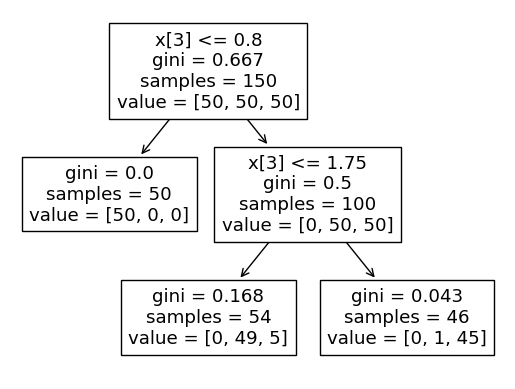

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text  # Importa export_text
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_iris
from sklearn import tree

# Carga los datos de las galaxias (simulado para este ejemplo)
# Reemplaza esto con la carga de tu dataset de galaxias
galaxias = load_iris()
X, y = galaxias.data, galaxias.target

# Crear y entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X, y)

# Mostrar el árbol resultante
tree.plot_tree(clf)

# Mostrar las decisiones del árbol
r = export_text(clf, feature_names=galaxias['feature_names'])
print(r)


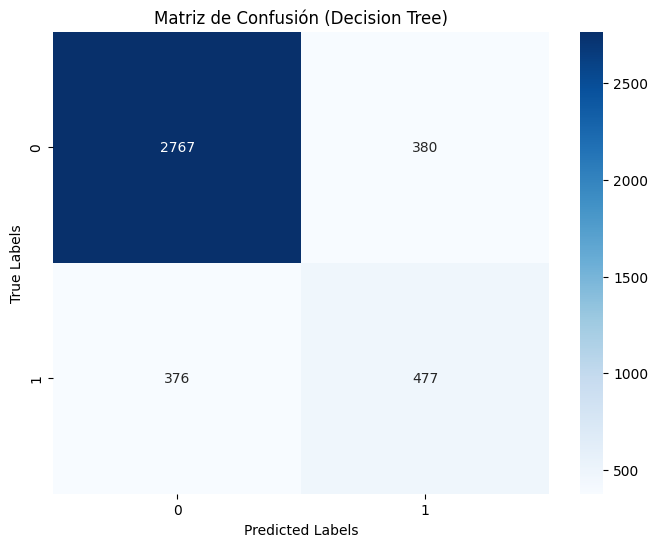

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm_dt = confusion_matrix(y_test_binary, y_pred_dt)

# Mostrar la matriz de confusión a color
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión (Decision Tree)')
plt.show()



In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

# Calcular precision, sensibilidad y exactitud
precision_dt = precision_score(y_test_binary, y_pred_dt)
recall_dt = recall_score(y_test_binary, y_pred_dt)
accuracy_dt = accuracy_score(y_test_binary, y_pred_dt)

# Mostrar sensibilidad, precisión y exactitud
print(f'Precision (Decision Tree): {precision_dt}')
print(f'Recall (Sensibilidad) (Decision Tree): {recall_dt}')
print(f'Accuracy (Exactitud) (Decision Tree): {accuracy_dt}')



Precision (Decision Tree): 0.5565927654609102
Recall (Sensibilidad) (Decision Tree): 0.5592028135990621
Accuracy (Exactitud) (Decision Tree): 0.811


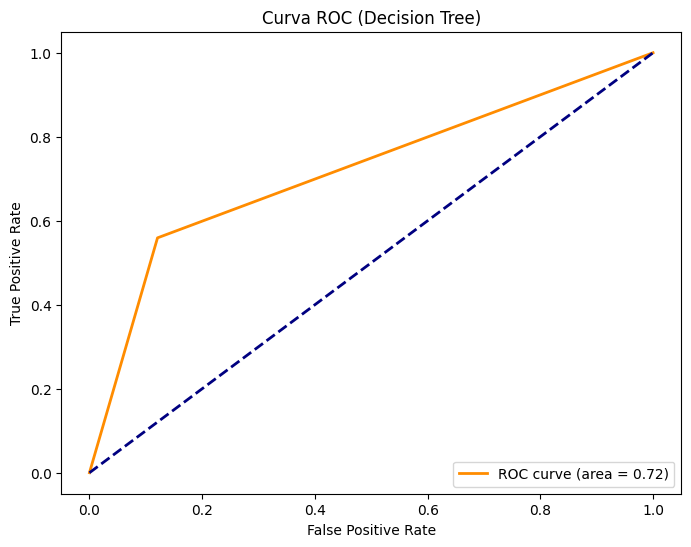

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Calcular la curva ROC
fpr_dt, tpr_dt, _ = roc_curve(y_test_binary, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Mostrar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC (Decision Tree)')
plt.legend(loc='lower right')
plt.show()


#  **Perceptrón Multicapa**

In [ ]:
from sklearn.neural_network import MLPClassifier

# Crear y entrenar el modelo de Perceptrón Multicapa (MLP)
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train, y_train_binary)

# Hacer predicciones
y_pred_mlp = mlp_model.predict(X_test)

# Métricas de evaluación
accuracy_mlp = accuracy_score(y_test_binary, y_pred_mlp)
confusion_mat_mlp = confusion_matrix(y_test_binary, y_pred_mlp)
class_report_mlp = classification_report(y_test_binary, y_pred_mlp)

# Mostrar métricas
print("Accuracy (MLP):", accuracy_mlp)
print("Confusion Matrix (MLP):\n", confusion_mat_mlp)
print("Classification Report (MLP):\n", class_report_mlp)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (MLP): 0.8485
Confusion Matrix (MLP):
 [[2903  244]
 [ 362  491]]
Classification Report (MLP):
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      3147
           1       0.67      0.58      0.62       853

    accuracy                           0.85      4000
   macro avg       0.78      0.75      0.76      4000
weighted avg       0.84      0.85      0.84      4000



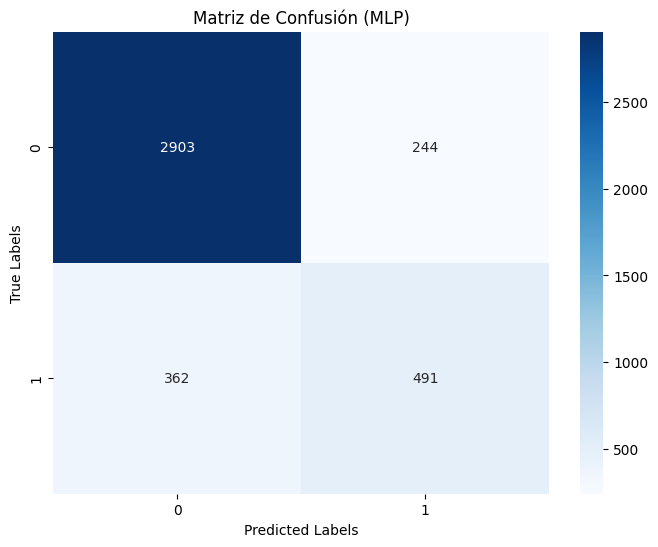

In [ ]:

# Calcular la matriz de confusión
cm_mlp = confusion_matrix(y_test_binary, y_pred_mlp)

# Mostrar la matriz de confusión a color
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión (MLP)')
plt.show()


In [ ]:
from sklearn.metrics import recall_score

# Calcular sensibilidad
sensibilidad_mlp = recall_score(y_test_binary, y_pred_mlp)
print("Sensibilidad (MLP):", sensibilidad_mlp)


Sensibilidad (MLP): 0.5756154747948418


In [ ]:
from sklearn.metrics import precision_score

# Calcular precisión
precision_mlp = precision_score(y_test_binary, y_pred_mlp)
print("Precisión (MLP):", precision_mlp)


Precisión (MLP): 0.6680272108843538


In [ ]:
from sklearn.metrics import accuracy_score

# Calcular exactitud
exactitud_mlp = accuracy_score(y_test_binary, y_pred_mlp)
print("Exactitud (MLP):", exactitud_mlp)


Exactitud (MLP): 0.8485


Área bajo la Curva ROC (AUC) (MLP): 0.9061578585235907


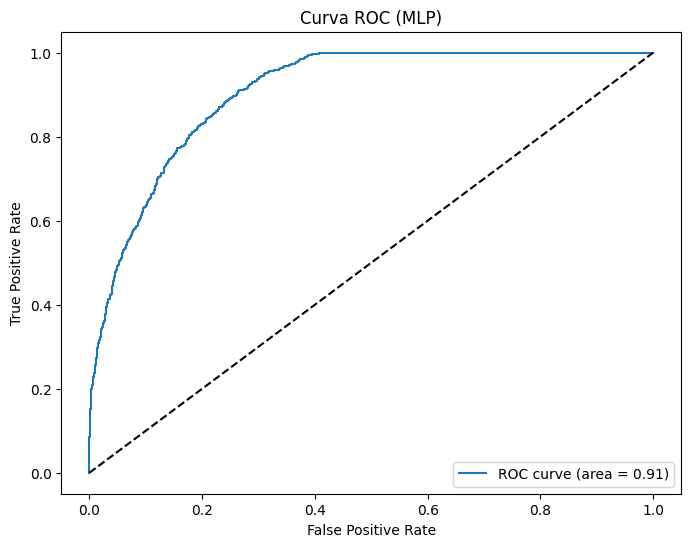

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular Curva ROC
y_prob_mlp = mlp_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_mlp)

# Calcular Área bajo la Curva ROC (AUC)
auc_mlp = roc_auc_score(y_test_binary, y_prob_mlp)
print("Área bajo la Curva ROC (AUC) (MLP):", auc_mlp)

# Mostrar Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_mlp)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC (MLP)')
plt.legend(loc='lower right')
plt.show()


# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Crear y entrenar el modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train_binary)

# Hacer predicciones
y_pred_nb = nb_model.predict(X_test)

# Métricas de evaluación
accuracy_nb = accuracy_score(y_test_binary, y_pred_nb)
confusion_mat_nb = confusion_matrix(y_test_binary, y_pred_nb)
class_report_nb = classification_report(y_test_binary, y_pred_nb)

# Mostrar métricas
print("Accuracy (Naive Bayes):", accuracy_nb)
print("Confusion Matrix (Naive Bayes):\n", confusion_mat_nb)
print("Classification Report (Naive Bayes):\n", class_report_nb)


Accuracy (Naive Bayes): 0.7895
Confusion Matrix (Naive Bayes):
 [[2863  284]
 [ 558  295]]
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      3147
           1       0.51      0.35      0.41       853

    accuracy                           0.79      4000
   macro avg       0.67      0.63      0.64      4000
weighted avg       0.77      0.79      0.77      4000



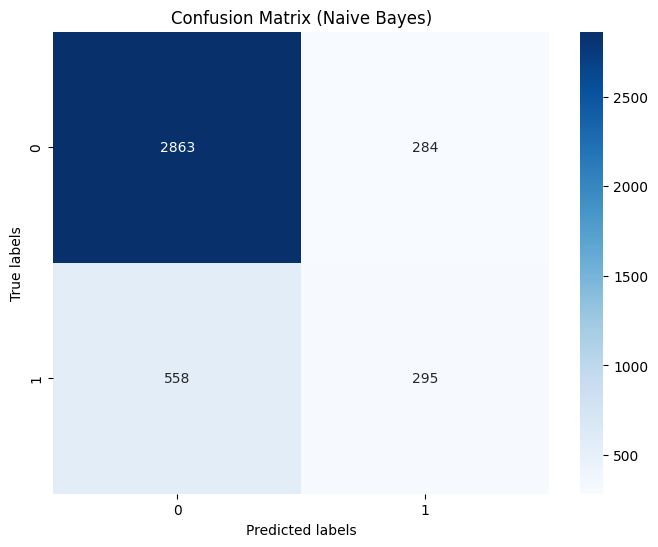

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de confusión
confusion_mat_nb = confusion_matrix(y_test_binary, y_pred_nb)

# Mostrar la matriz de confusión a color
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_nb, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()


In [ ]:
# Calcular la sensibilidad (recall) para cada clase
from sklearn.metrics import recall_score

sensitivity_nb = recall_score(y_test_binary, y_pred_nb, average=None)
print("Sensitivity (Naive Bayes):\n", sensitivity_nb)


Sensitivity (Naive Bayes):
 [0.90975532 0.34583822]


In [ ]:
# Calcular la precisión para cada clase
from sklearn.metrics import precision_score

precision_nb = precision_score(y_test_binary, y_pred_nb, average=None)
print("Precision (Naive Bayes):\n", precision_nb)


Precision (Naive Bayes):
 [0.8368898  0.50949914]


In [ ]:
# Calcular la exactitud (accuracy)
accuracy_nb = accuracy_score(y_test_binary, y_pred_nb)
print("Accuracy (Naive Bayes):", accuracy_nb)


Accuracy (Naive Bayes): 0.7895


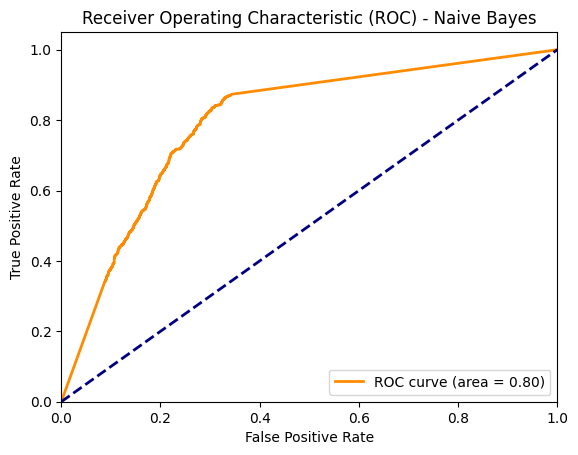

In [ ]:
# Calcular y mostrar la curva ROC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de pertenencia a cada clase
y_probs_nb = nb_model.predict_proba(X_test)

# Calcular la curva ROC para la clase positiva (1)
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs_nb[:, 1])
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Naive Bayes')
plt.legend(loc="lower right")
plt.show()


# ** KNN (K-Nearest Neighbors)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Crear y entrenar el modelo KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train_binary)

# Hacer predicciones
y_pred_knn = knn_model.predict(X_test)

# Métricas de evaluación
accuracy_knn = accuracy_score(y_test_binary, y_pred_knn)
confusion_mat_knn = confusion_matrix(y_test_binary, y_pred_knn)
class_report_knn = classification_report(y_test_binary, y_pred_knn)

# Mostrar métricas
print("Accuracy (KNN):", accuracy_knn)
print("Confusion Matrix (KNN):\n", confusion_mat_knn)
print("Classification Report (KNN):\n", class_report_knn)


Accuracy (KNN): 0.842
Confusion Matrix (KNN):
 [[2880  267]
 [ 365  488]]
Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      3147
           1       0.65      0.57      0.61       853

    accuracy                           0.84      4000
   macro avg       0.77      0.74      0.75      4000
weighted avg       0.84      0.84      0.84      4000



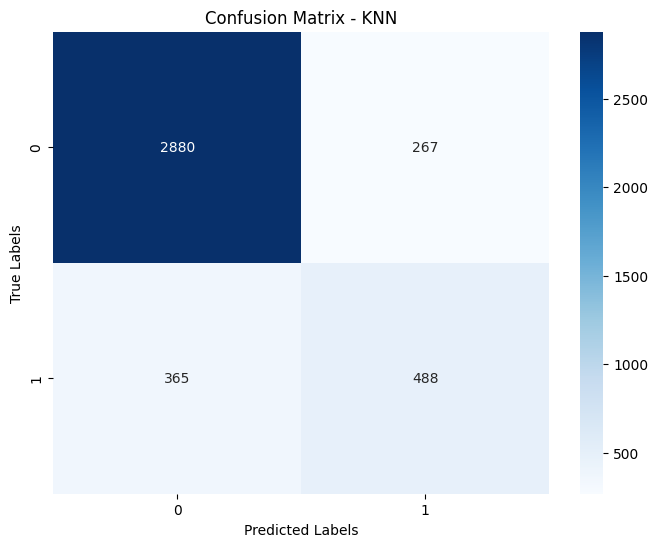

In [ ]:


# Calcular la matriz de confusión
confusion_mat_knn = confusion_matrix(y_test_binary, y_pred_knn)

# Mostrar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_knn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - KNN')
plt.show()


In [ ]:

# Calcular la sensibilidad
sensitivity_knn = recall_score(y_test_binary, y_pred_knn)

print("Sensitivity (KNN):", sensitivity_knn)


Sensitivity (KNN): 0.5720984759671747


In [ ]:

# Calcular la precisión
precision_knn = precision_score(y_test_binary, y_pred_knn)

print("Precision (KNN):", precision_knn)


Precision (KNN): 0.6463576158940397


In [ ]:
# Utilizando la métrica de exactitud previamente calculada
print("Accuracy (KNN):", accuracy_knn)


Accuracy (KNN): 0.842


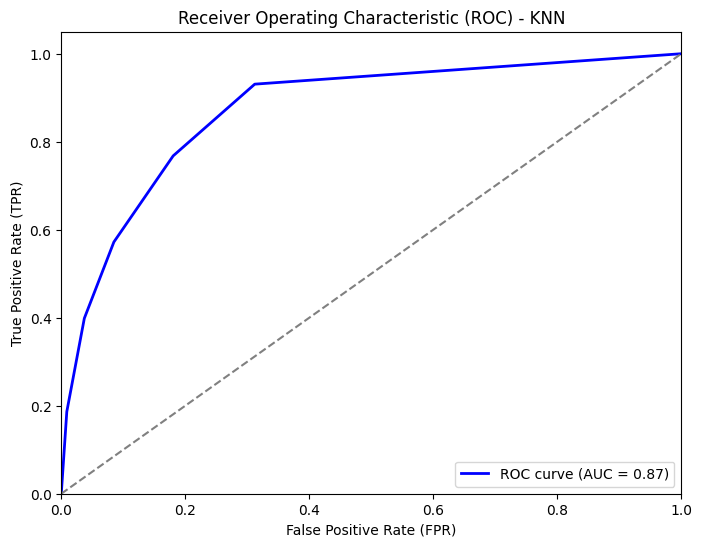

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test_binary, y_proba_knn)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Mostrar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) - KNN')
plt.legend(loc="lower right")
plt.show()


# **Investigación 1: REDES NEURONALES CONVOLUCIONALES**

Epoch 1/10
500/500 [==============================] - 58s 114ms/step - loss: 0.3760 - accuracy: 0.7988
Epoch 2/10
500/500 [==============================] - 57s 114ms/step - loss: 0.3386 - accuracy: 0.8230
Epoch 3/10
500/500 [==============================] - 57s 113ms/step - loss: 0.3230 - accuracy: 0.8320
Epoch 4/10
500/500 [==============================] - 56s 112ms/step - loss: 0.3125 - accuracy: 0.8435
Epoch 5/10
500/500 [==============================] - 54s 108ms/step - loss: 0.3016 - accuracy: 0.8465
Epoch 6/10
500/500 [==============================] - 55s 110ms/step - loss: 0.2941 - accuracy: 0.8515
Epoch 7/10
500/500 [==============================] - 56s 113ms/step - loss: 0.2870 - accuracy: 0.8593
Epoch 8/10
500/500 [==============================] - 57s 113ms/step - loss: 0.2807 - accuracy: 0.8626
Epoch 9/10
500/500 [==============================] - 56s 113ms/step - loss: 0.2719 - accuracy: 0.8674
Epoch 10/10
125/125 [==============================] - 3s 27ms/step
Accur

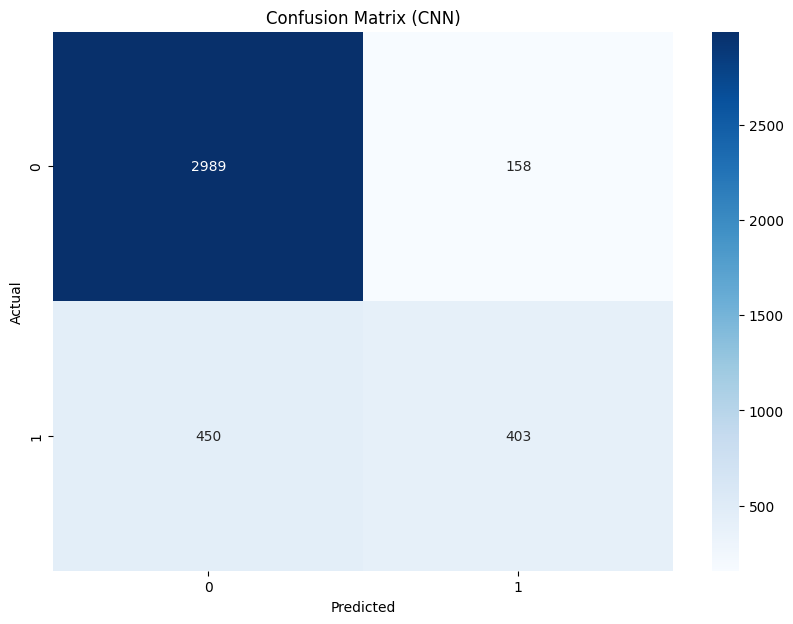

Sensibilidad: 0.47245017584994137
Precisión: 0.7183600713012478
Exactitud: 0.848


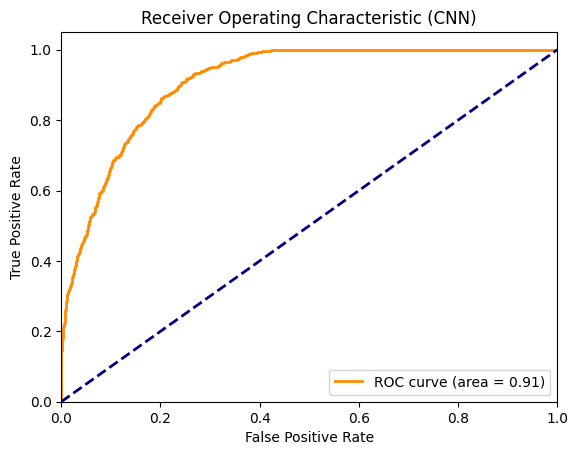

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos (reemplaza con la ruta de tus datos)
galaxias = pd.read_csv("/content/T_F_DR14_ZooSpec_10000.csv")

# Dividir los datos en características (X) y variable objetivo (y)
X = galaxias.iloc[:, 2:4098].values
y = galaxias['target'].values

# Imputar valores NaN en X
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Convertir etiquetas continuas en clases binarias (0 o 1)
umbral = 0.5  # Define el umbral para la separación de clases
y_train_binary = (y_train > umbral).astype(int)
y_test_binary = (y_test > umbral).astype(int)

# Redimensionar los datos para que sean aptos para la entrada en la CNN
X_train = X_train.reshape(-1, 64, 64, 1).astype('float32')
X_test = X_test.reshape(-1, 64, 64, 1).astype('float32')

# Crear y compilar el modelo CNN
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo CNN
model.fit(X_train, y_train_binary, epochs=10, batch_size=32)

# Evaluar el modelo CNN
y_pred_proba = model.predict(X_test).ravel()
y_pred_cnn = (y_pred_proba > 0.5).astype(int)

accuracy_cnn = accuracy_score(y_test_binary, y_pred_cnn)
confusion_mat_cnn = confusion_matrix(y_test_binary, y_pred_cnn)
class_report_cnn = classification_report(y_test_binary, y_pred_cnn)

# Mostrar métricas
print("Accuracy (CNN):", accuracy_cnn)
print("Confusion Matrix (CNN):\n", confusion_mat_cnn)
print("Classification Report (CNN):\n", class_report_cnn)

# Graficar la Matriz de Confusión a color
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat_cnn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (CNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calcular Sensibilidad, Precisión y Exactitud
tn, fp, fn, tp = confusion_mat_cnn.ravel()
sensibilidad = tp / (tp + fn)
precision = tp / (tp + fp)
exactitud = (tp + tn) / (tp + tn + fp + fn)

print(f'Sensibilidad: {sensibilidad}')
print(f'Precisión: {precision}')
print(f'Exactitud: {exactitud}')

# Graficar la Curva ROC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (CNN)')
plt.legend(loc="lower right")
plt.show()


# **Investigación 2:Clasificación con modelo de Aprendizaje no supervisado**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


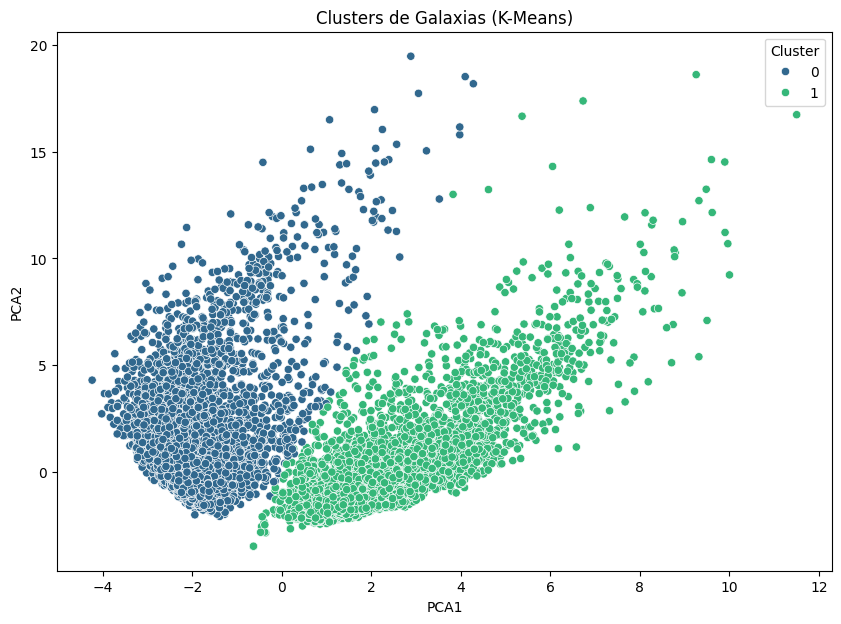

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos (reemplaza con la ruta de tus datos)
galaxias = pd.read_csv("/content/T_F_DR14_ZooSpec_10000.csv")

# Dividir los datos en características (X)
X = galaxias.iloc[:, 2:4098].values

# Imputar valores NaN en X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Aplicar K-Means con 2 clusters (debido a la clasificación binaria original)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_imputed)

# Reducir la dimensionalidad para visualizar los clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed)

# Crear un DataFrame para visualizar los clusters
df_clusters = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_clusters['Cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_clusters, palette='viridis')
plt.title('Clusters de Galaxias (K-Means)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


In [ ]:
cluster_counts = df_clusters['Cluster'].value_counts()
print(cluster_counts)


Cluster
1    10036
0     9961
Name: count, dtype: int64


In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)


[[0.02464195 0.02433741 0.02471843 ... 0.         0.         0.        ]
 [0.14145895 0.14002612 0.13872729 ... 0.         0.         0.        ]]


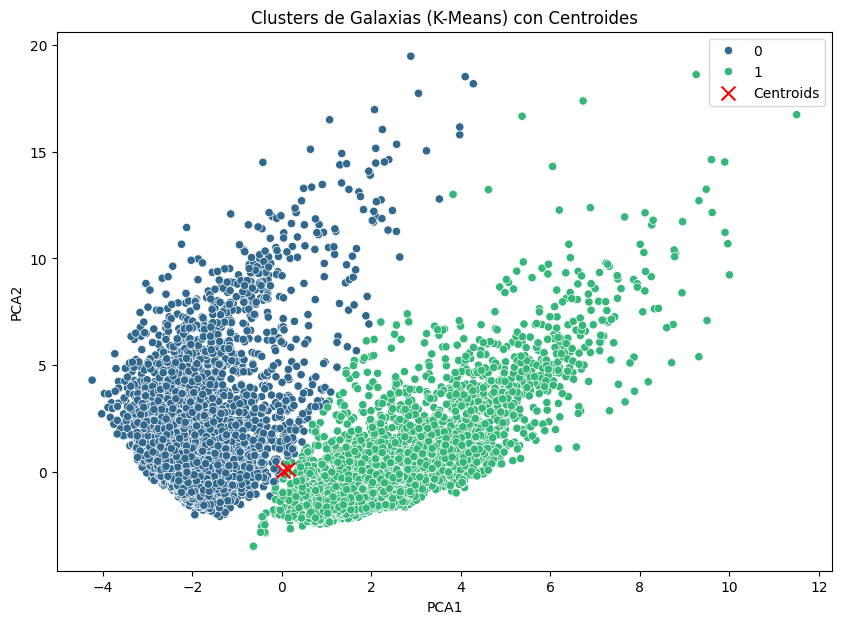

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_clusters, palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.title('Clusters de Galaxias (K-Means) con Centroides')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


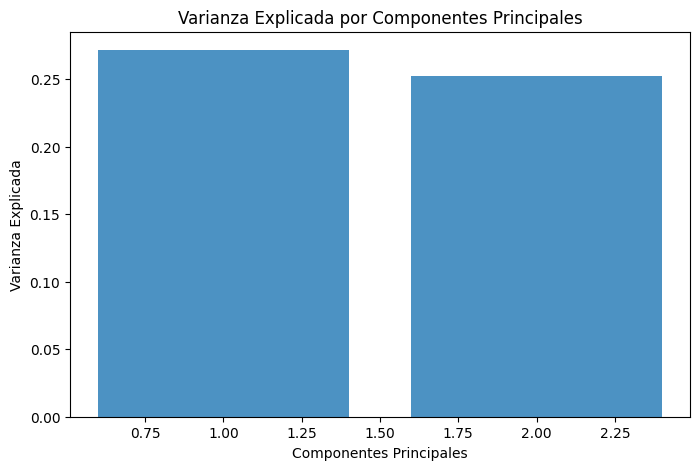

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.8)
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componentes Principales')
plt.show()

